In [386]:
from numpy import genfromtxt
#data_mood_pandas = pandas.read_csv('Data/list_includingT.csv')
data_mood_pandas2 = pandas.read_csv('Data/list_onlyTargets.csv')
#data_mood = genfromtxt('Data/dataset_mood_smartphone_dates.csv', delimiter=',')
print(data_mood_pandas2)
#print(data_mood_pandas['Value'])
#print(data_mood_pandas['Participant'])
#print(data_mood_pandas['Day'])
#print(data_mood_pandas['Mood'])
#print(np.array(data_mood_pandas2['Mood']))


      Unnamed: 0  Participant   Day      Mood   Valence   Arousal  Activity  \
0              0          1.0   0.0  6.250000  0.750000 -0.250000       NaN   
1              2          1.0  23.0  6.200000  0.200000  0.200000  0.134050   
2              3          1.0  24.0  6.400000  0.500000  0.600000  0.236880   
3              4          1.0  25.0  6.800000  0.800000  0.200000  0.142741   
4              5          1.0  26.0  6.000000  0.000000  0.800000  0.078961   
5              6          1.0  27.0  6.750000  0.500000  0.500000  0.098374   
6              7          1.0  28.0  6.600000  0.600000 -0.200000  0.101308   
7              8          1.0  29.0  7.000000  0.800000  0.200000  0.159511   
8              9          1.0  30.0  6.400000  0.600000 -0.600000  0.095698   
9             10          1.0  31.0  8.000000  1.000000  0.200000  0.068203   
10            11          1.0  32.0  7.500000  0.750000 -0.500000  0.049093   
11            12          1.0  33.0  7.400000  0.600

In [119]:
from numpy import genfromtxt
sinwave = genfromtxt('sinwave.csv', delimiter=',')
#sinwave = pandas.read_csv('sinwave.csv')
#print(sinwave[:1000])

data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

In [511]:
import numpy as np
import pandas
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM, GRU

data_mood_pandas = pandas.read_csv('Data/list_includingT.csv')
part1 = data_mood_pandas.loc[data_mood_pandas['Participant'] == 20]
part1_Mood = part1['Mood']/max(data_mood_pandas['Mood'])
#print(part1_Mood)
# index = pd.to_datetime(part1['Day'], unit = 'D')
# y = pd.DataFrame(np.array(part1_Mood), index = index)

# Generate dummy data
x_train = np.array(part1_Mood[:60])
y_train = np.array(part1_Mood[1:61])
x_test = np.array(part1_Mood[57:67])
y_test = np.array(part1_Mood[58:68])

# # all data
# x_train = np.array(data_mood_pandas['Mood'][:1000]/max(data_mood_pandas['Mood']))#

# y_train = np.array(data_mood_pandas['Mood'][1:1001]/max(data_mood_pandas['Mood']))#sinwave[10:4010]
# x_test = np.array(data_mood_pandas['Mood'][-201:-1]/max(data_mood_pandas['Mood']))#sinwave[1000:1100]
# y_test = np.array(data_mood_pandas['Mood'][-200:]/max(data_mood_pandas['Mood']))#sinwave[1010:1110]

# # sinwave
# x_train = (sinwave[:4000] + 1 )/ 2
# y_train = (sinwave[1:4001] + 1 )/2
# x_test = (sinwave[4000:5000] + 1)/2
# y_test = (sinwave[4001:5001] + 1)/2

# x_train = x_train.reshape((40,100))
# y_train = y_train.reshape((40,100))
# #print(trainX)
# x_test = x_test.reshape((10,100))
# y_test = y_test.reshape((10,100))


x_train = x_train.reshape((6,10))
y_train = y_train.reshape((6,10))
#print(trainX)
x_test = x_test.reshape((1,10))
y_test = y_test.reshape((1,10))
#print(x_train.shape)


### LSTM Network
model = Sequential()
model.add(Embedding(10, output_dim=10))
model.add(LSTM(32, input_shape = (6,10)))
model.add(Dropout(0.5))

model.add(Dense(10, activation='tanh'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

# Multi-layer Perceptron
# x_train = np.array(part1_Mood[:60])
# y_train = np.array(part1_Mood[1:61])
# x_test = np.array(part1_Mood[57:67])
# y_test = np.array(part1_Mood[58:68])

# model = Sequential()
# model.add(Dense(32, activation='relu', input_dim=10))
# # model.add(Dropout(0.5))
# # model.add(Dense(32, activation='relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(10, activation='sigmoid'))

# model.compile(loss='mse',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=1, epochs=1000)
score = model.evaluate(x_test, y_test, batch_size=1)

Epoch 1/1000
6/6 [==============================] - 8s 1s/step - loss: 0.5319 - acc: 0.0000e+00
Epoch 2/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.4797 - acc: 0.0000e+00
Epoch 3/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.4021 - acc: 0.1667
Epoch 4/1000
6/6 [==============================] - 0s 33ms/step - loss: 0.2706 - acc: 0.0000e+00
Epoch 5/1000
6/6 [==============================] - 0s 40ms/step - loss: 0.1972 - acc: 0.0000e+00
Epoch 6/1000
6/6 [==============================] - 0s 34ms/step - loss: 0.1244 - acc: 0.1667
Epoch 7/1000
6/6 [==============================] - 0s 38ms/step - loss: 0.1053 - acc: 0.1667
Epoch 8/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0684 - acc: 0.1667
Epoch 9/1000
6/6 [==============================] - 0s 28ms/step - loss: 0.0528 - acc: 0.3333
Epoch 10/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0443 - acc: 0.1667
Epoch 11/1000
6/6 [==========================

6/6 [==============================] - 0s 30ms/step - loss: 0.0135 - acc: 0.1667
Epoch 86/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0110 - acc: 0.3333
Epoch 87/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.0178 - acc: 0.1667
Epoch 88/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0232 - acc: 0.0000e+00
Epoch 89/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.0187 - acc: 0.1667
Epoch 90/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0214 - acc: 0.0000e+00
Epoch 91/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0158 - acc: 0.3333
Epoch 92/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0113 - acc: 0.1667
Epoch 93/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0145 - acc: 0.1667
Epoch 94/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0187 - acc: 0.1667
Epoch 95/1000
6/6 [==============================] - 0s 

6/6 [==============================] - 0s 33ms/step - loss: 0.0194 - acc: 0.0000e+00
Epoch 170/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0110 - acc: 0.1667
Epoch 171/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0108 - acc: 0.3333
Epoch 172/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0136 - acc: 0.1667
Epoch 173/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0076 - acc: 0.1667
Epoch 174/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0113 - acc: 0.3333
Epoch 175/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.0126 - acc: 0.1667
Epoch 176/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0081 - acc: 0.1667
Epoch 177/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0123 - acc: 0.0000e+00
Epoch 178/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0147 - acc: 0.1667
Epoch 179/1000
6/6 [===========================

6/6 [==============================] - 0s 30ms/step - loss: 0.0099 - acc: 0.0000e+00
Epoch 254/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0086 - acc: 0.0000e+00
Epoch 255/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.0092 - acc: 0.5000
Epoch 256/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0114 - acc: 0.5000
Epoch 257/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0066 - acc: 0.0000e+00
Epoch 258/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0110 - acc: 0.3333
Epoch 259/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0080 - acc: 0.1667
Epoch 260/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0077 - acc: 0.0000e+00
Epoch 261/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0110 - acc: 0.1667
Epoch 262/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0087 - acc: 0.1667
Epoch 263/1000
6/6 [===================

6/6 [==============================] - 0s 32ms/step - loss: 0.0115 - acc: 0.3333
Epoch 338/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.0067 - acc: 0.3333
Epoch 339/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.0090 - acc: 0.1667
Epoch 340/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0063 - acc: 0.3333
Epoch 341/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.0065 - acc: 0.3333
Epoch 342/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0092 - acc: 0.6667
Epoch 343/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0070 - acc: 0.1667
Epoch 344/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.0138 - acc: 0.1667
Epoch 345/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0075 - acc: 0.3333
Epoch 346/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.0087 - acc: 0.1667
Epoch 347/1000
6/6 [==============================] - 0

6/6 [==============================] - 0s 30ms/step - loss: 0.0063 - acc: 0.1667
Epoch 422/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0082 - acc: 0.3333
Epoch 423/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0084 - acc: 0.3333
Epoch 424/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0068 - acc: 0.5000
Epoch 425/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0075 - acc: 0.3333
Epoch 426/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0063 - acc: 0.1667
Epoch 427/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0081 - acc: 0.3333
Epoch 428/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0074 - acc: 0.5000
Epoch 429/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0048 - acc: 0.8333
Epoch 430/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0082 - acc: 0.1667
Epoch 431/1000
6/6 [==============================] - 0

6/6 [==============================] - 0s 28ms/step - loss: 0.0064 - acc: 0.1667
Epoch 507/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0062 - acc: 0.3333
Epoch 508/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0051 - acc: 0.3333
Epoch 509/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0054 - acc: 0.3333
Epoch 510/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0047 - acc: 0.6667
Epoch 511/1000
6/6 [==============================] - 0s 28ms/step - loss: 0.0058 - acc: 0.5000
Epoch 512/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0068 - acc: 0.3333
Epoch 513/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0047 - acc: 0.1667
Epoch 514/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0049 - acc: 0.5000
Epoch 515/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0070 - acc: 0.5000
Epoch 516/1000
6/6 [==============================] - 0

6/6 [==============================] - 0s 30ms/step - loss: 0.0070 - acc: 0.1667
Epoch 592/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0057 - acc: 0.0000e+00
Epoch 593/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0061 - acc: 0.3333
Epoch 594/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0042 - acc: 0.3333
Epoch 595/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0054 - acc: 0.5000
Epoch 596/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0039 - acc: 0.3333
Epoch 597/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0088 - acc: 0.1667
Epoch 598/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0045 - acc: 0.5000
Epoch 599/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0048 - acc: 0.1667
Epoch 600/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0050 - acc: 0.3333
Epoch 601/1000
6/6 [==============================]

6/6 [==============================] - 0s 32ms/step - loss: 0.0049 - acc: 0.5000
Epoch 677/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0055 - acc: 0.3333
Epoch 678/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0054 - acc: 0.3333
Epoch 679/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0045 - acc: 0.6667
Epoch 680/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0041 - acc: 0.1667
Epoch 681/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0048 - acc: 0.3333
Epoch 682/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0046 - acc: 0.3333
Epoch 683/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0051 - acc: 0.3333
Epoch 684/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0044 - acc: 0.1667
Epoch 685/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0049 - acc: 0.5000
Epoch 686/1000
6/6 [==============================] - 0

6/6 [==============================] - 0s 31ms/step - loss: 0.0046 - acc: 0.1667
Epoch 762/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0038 - acc: 0.3333
Epoch 763/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0040 - acc: 0.5000
Epoch 764/1000
6/6 [==============================] - 0s 28ms/step - loss: 0.0048 - acc: 0.0000e+00
Epoch 765/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0044 - acc: 0.6667
Epoch 766/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0040 - acc: 0.3333
Epoch 767/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0042 - acc: 0.3333
Epoch 768/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0044 - acc: 0.3333
Epoch 769/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0057 - acc: 0.3333
Epoch 770/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0045 - acc: 0.1667
Epoch 771/1000
6/6 [==============================]

6/6 [==============================] - 0s 31ms/step - loss: 0.0042 - acc: 0.1667
Epoch 847/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0045 - acc: 0.1667
Epoch 848/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0051 - acc: 0.3333
Epoch 849/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0054 - acc: 0.1667
Epoch 850/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0044 - acc: 0.5000
Epoch 851/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0049 - acc: 0.3333
Epoch 852/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0040 - acc: 0.3333
Epoch 853/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0045 - acc: 0.3333
Epoch 854/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0044 - acc: 0.5000
Epoch 855/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0043 - acc: 0.5000
Epoch 856/1000
6/6 [==============================] - 0

6/6 [==============================] - 0s 30ms/step - loss: 0.0043 - acc: 0.1667
Epoch 932/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0042 - acc: 0.3333
Epoch 933/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0038 - acc: 0.1667
Epoch 934/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0045 - acc: 0.1667
Epoch 935/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0041 - acc: 0.3333
Epoch 936/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0064 - acc: 0.3333
Epoch 937/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.0043 - acc: 0.0000e+00
Epoch 938/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0050 - acc: 0.0000e+00
Epoch 939/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0042 - acc: 0.1667
Epoch 940/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.0038 - acc: 0.5000
Epoch 941/1000
6/6 [===========================

## simple plot

[[0.74 0.72 0.74 0.76]
 [0.72 0.74 0.76 0.7 ]
 [0.74 0.76 0.7  0.66]
 [0.76 0.7  0.66 0.62]
 [0.7  0.66 0.62 0.76]
 [0.66 0.62 0.76 0.8 ]
 [0.62 0.76 0.8  0.72]
 [0.76 0.8  0.72 0.58]
 [0.8  0.72 0.58 0.54]
 [0.72 0.58 0.54 0.74]]
[[0.71109915]
 [0.7055592 ]
 [0.6950276 ]
 [0.6909188 ]
 [0.69892204]
 [0.71807   ]
 [0.705623  ]
 [0.6884171 ]
 [0.67618906]
 [0.6933437 ]]


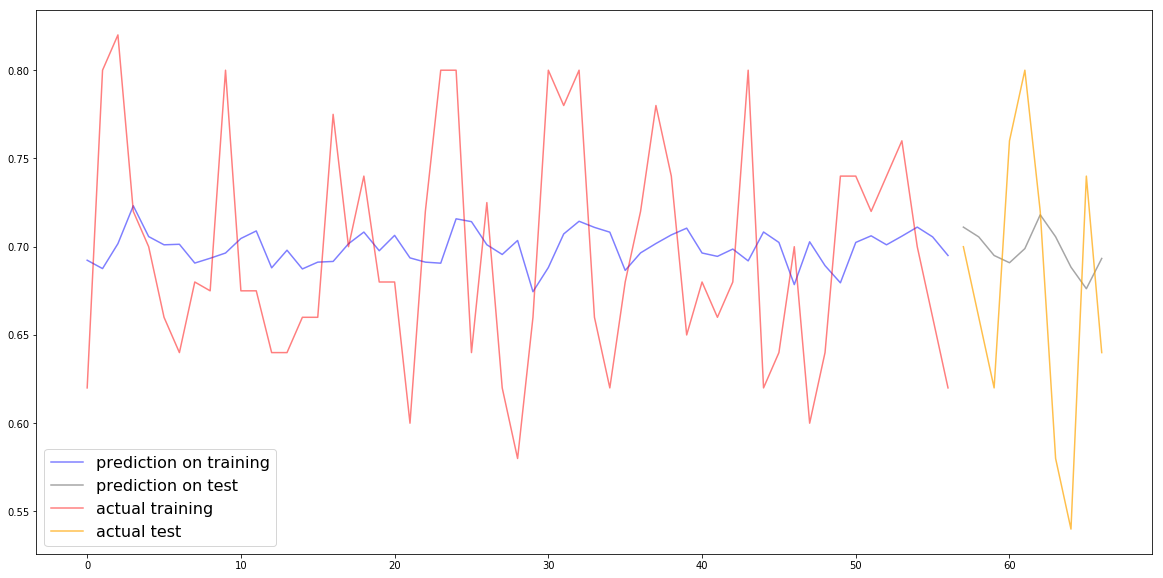

In [589]:
import matplotlib.pyplot as plt
y_predict_test = model.predict(x_test, batch_size=2, verbose=0, steps=None)
y_predict = model.predict(x_train, batch_size=2, verbose=0, steps=None)

print(x_test)
print(y_predict_test)

#print(y_predict)
x = np.arange(0,57)
x2 = np.arange(57,67)
plt.figure(figsize=(20,10))
plt.plot(x, y_predict.reshape(57,), color = 'b', alpha = 0.5, label = "prediction on training")
#plt.plot(x, x_train.reshape(60,), color = 'green', alpha = 0.7, label ="Benchmark")
plt.plot(x2, y_predict_test.reshape(10,), color = 'grey', alpha = 0.7, label = "prediction on test")
#plt.plot(x2, x_test.reshape(10,), color = 'green', alpha = 0.7, label ="Benchmark")
plt.plot(x, y_train.reshape(57,), color = 'r', alpha = 0.5, label = "actual training")
plt.plot(x2, y_test.reshape(10,), color = 'orange', alpha = 0.7, label = "actual test")
plt.legend(prop={'size': 16})
plt.show()

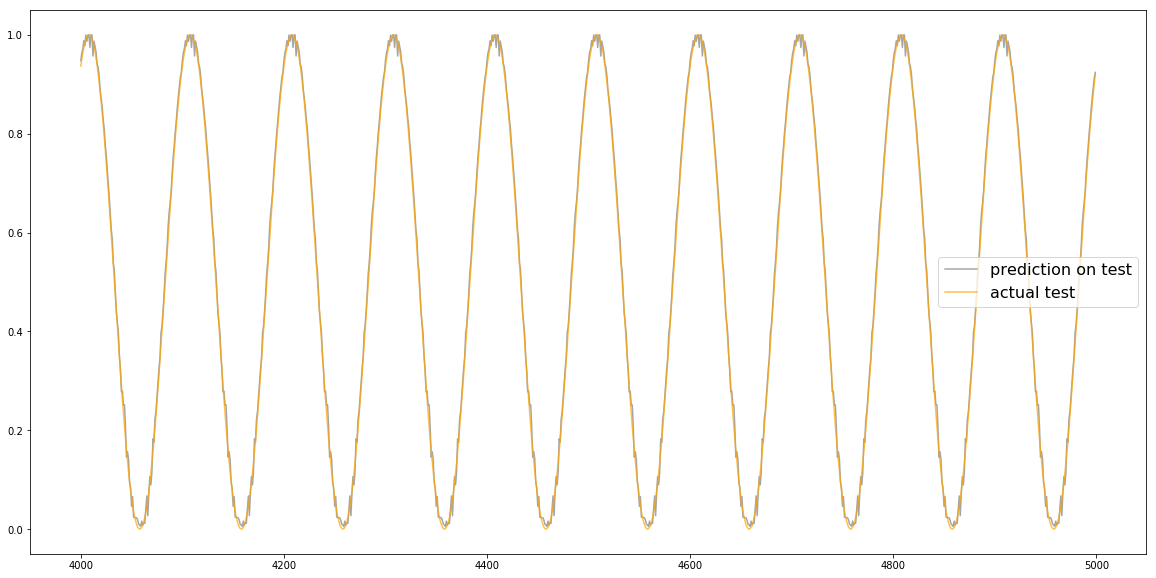

In [429]:
import matplotlib.pyplot as plt
y_predict_test = model.predict(x_test, batch_size=10, verbose=0, steps=None)
y_predict = model.predict(x_train, batch_size=10, verbose=0, steps=None)



#print(y_predict)
x = np.arange(0,4000)
x2 = np.arange(4000,5000)
plt.figure(figsize=(20,10))
#plt.plot(x, y_predict.reshape(4000,), color = 'b', alpha = 0.5, label = "prediction on training")
#plt.plot(x, x_train.reshape(60,), color = 'green', alpha = 0.7, label ="Benchmark")
plt.plot(x2, y_predict_test.reshape(1000,), color = 'grey', alpha = 0.7, label = "prediction on test")
#plt.plot(x2, x_test.reshape(10,), color = 'green', alpha = 0.7, label ="Benchmark")
#plt.plot(x, y_train.reshape(4000,), color = 'r', alpha = 0.5, label = "actual training")
plt.plot(x2, y_test.reshape(1000,), color = 'orange', alpha = 0.7, label = "actual test")
plt.legend(prop={'size': 16})
plt.show()

In [318]:

print(y_test.reshape(10,))
print(y_predict_test.reshape(10,))
print(x_test.reshape(10,))
#y_predict_test

[0.75       0.70714286 0.66428571 0.81428571 0.85714286 0.77142857
 0.62142857 0.57857143 0.79285714 0.68571429]
[0.6459311  0.64460033 0.77219355 0.8128521  0.79118276 0.83176565
 0.740874   0.6282741  0.695502   0.74154407]
[0.81428571 0.75       0.70714286 0.66428571 0.81428571 0.85714286
 0.77142857 0.62142857 0.57857143 0.79285714]


# MLP

In [588]:



data_mood_pandas = pandas.read_csv('Data/list_includingT.csv')
part1 = data_mood_pandas.loc[data_mood_pandas['Participant'] == 20]
data_mood_pandas = pandas.read_csv('Data/list_includingT.csv')
#part1_Mood = part1['Mood']/max(data_mood_pandas['Mood'])
part1.fillna(0, inplace = True)
part1_Activity = part1['Activity']
part1_Valence = part1['Valence']
#print(part1_Activity)
part1_Activity.fillna(0, inplace = True)

#print(part1_Activity)
# index = pd.to_datetime(part1['Day'], unit = 'D')
# y = pd.DataFrame(np.array(part1_Mood), index = index)

# Generate dummy data
x_train = np.array(part20_Mood[:57])
x_train = np.column_stack((x_train, np.array(part20_Mood[1:58]), np.array(part20_Mood[2:59]), np.array(part20_Mood[3:60])))
#x_train = np.column_stack((x_train, np.array(part1_Activity[:60]), np.array(part1_Valence[:60])))
#print(x_train)
y_train = np.array(part20_Mood[4:61])
x_test = np.array(part20_Mood[54:64])
x_test = np.column_stack((x_test, np.array(part20_Mood[55:65]), np.array(part20_Mood[56:66]), np.array(part20_Mood[57:67])))          
y_test = np.array(part20_Mood[58:68])




# For a single-input model with 2 classes (binary classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
#data = np.random.random((1000, 2))
#labels = np.random.randint(2, size=(1000, 1))
#print(data)
#print(labels)

# Train the model, iterating on the data in batches of 32 samples
model.fit(x_train, y_train, epochs=20, batch_size=1)
score = model.evaluate(x_test, y_test, batch_size=1)

Epoch 1/20
57/57 [==============================] - 13s 221ms/step - loss: 0.0050 - acc: 0.0000e+00
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.0000e+00
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.0000e+00
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0044 - acc: 0.0000e+00
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0044 - acc: 0.0000e+00
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0000e+00
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0000e+00
Epoch 8/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0043 - acc: 0.0000e+00
Epoch 9/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0000e+00
Epoch 10/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0000e+00
Epoch 11/20
57/57 [=======

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(x_train, y_train, epochs=20, batch_size=1)
score = model.evaluate(x_test, y_test, batch_size=1)

In [582]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_338 (Dense)            (None, 32)                160       
_________________________________________________________________
dense_339 (Dense)            (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


# LSTM for all values

Tried to put in all first 30 values of mood in the LSTM function, to predict the next value

In [586]:
data_mood_pandas = pandas.read_csv('Data/list_includingT.csv')
part = np.zeros((27))
min_len = 60
x_train = np.array(())
y_train = np.array(())
for i in range(1,27):
    locals()['part{0}'.format(i)] = data_mood_pandas.loc[data_mood_pandas['Participant'] == i]
    locals()['part{0}_Mood'.format(i)] = data_mood_pandas.loc[data_mood_pandas['Participant'] == i]['Mood']/10
    #print(len(locals()['part{0}_Mood'.format(i)]))
    if len(locals()['part{0}_Mood'.format(i)]) < min_len:
        min_len = len(locals()['part{0}_Mood'.format(i)])
    x_train = np.append(x_train, np.array(locals()['part{0}_Mood'.format(i)])[:29])
    y_train = np.append(y_train, np.array(locals()['part{0}_Mood'.format(i)])[1:30])
print(min_len)
print(len(x_train))

#print(part2)


### LSTM Network
model = Sequential()
model.add(Embedding(1, output_dim=1))
model.add(LSTM(7, input_shape = (26,29)))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(x_train, y_train, epochs=10, batch_size=26)
score = model.evaluate(x_test, y_test, batch_size=26)

30
754
Epoch 1/10
754/754 [==============================] - 11s 15ms/step - loss: 0.0425 - acc: 0.0000e+00
Epoch 2/10
754/754 [==============================] - 0s 311us/step - loss: 0.0369 - acc: 0.0000e+00
Epoch 3/10
754/754 [==============================] - 0s 291us/step - loss: 0.0316 - acc: 0.0000e+00
Epoch 4/10
754/754 [==============================] - 0s 298us/step - loss: 0.0264 - acc: 0.0000e+00
Epoch 5/10
754/754 [==============================] - 0s 285us/step - loss: 0.0213 - acc: 0.0000e+00
Epoch 6/10
754/754 [==============================] - 0s 278us/step - loss: 0.0167 - acc: 0.0000e+00
Epoch 7/10
754/754 [==============================] - 0s 277us/step - loss: 0.0125 - acc: 0.0000e+00
Epoch 8/10
754/754 [==============================] - 0s 281us/step - loss: 0.0093 - acc: 0.0000e+00
Epoch 9/10
754/754 [==============================] - 0s 340us/step - loss: 0.0070 - acc: 0.0000e+00
Epoch 10/10
10/10 [==============================] - 4s 413ms/step


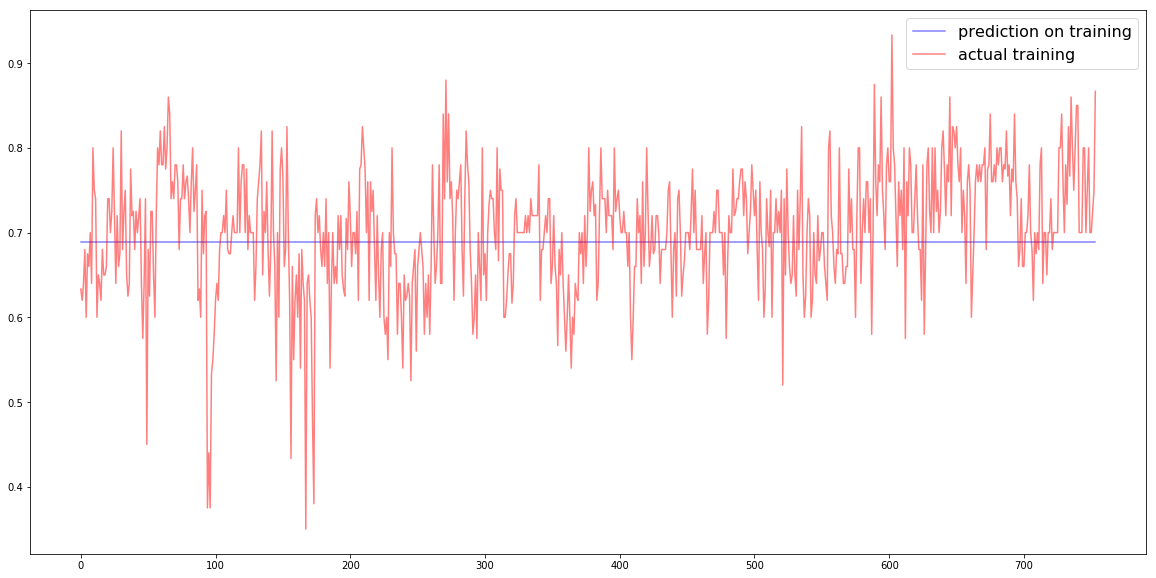

In [587]:
# Plot
max_train = 754
max_test = 750
min_test = 700
test_plot = max_test-min_test

# x_train = np.array(part20_Mood[:max_train])
# # x_train = np.column_stack((x_train, np.array(part20_Mood[1:58]), np.array(part20_Mood[2:59]), np.array(part20_Mood[3:60])))
# #x_train = np.column_stack((x_train, np.array(part1_Activity[:60]), np.array(part1_Valence[:60])))
# #print(x_train)
# y_train = np.array(part20_Mood[1:max_train+1])
# x_test = np.array(part20_Mood[min_test:max_test])
# # x_test = np.column_stack((x_test, np.array(part20_Mood[55:65]), np.array(part20_Mood[56:66]), np.array(part20_Mood[57:67])))          
# y_test = np.array(part20_Mood[min_test+1:max_test+1])


# model = Sequential()
# model.add(Dense(32, activation='tanh', input_dim=1))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop',
#               loss='mse',
#               metrics=['accuracy'])

# # Train the model, iterating on the data in batches of 32 samples
# model.fit(x_train, y_train, epochs=100, batch_size=1)

import matplotlib.pyplot as plt
y_predict_test = model.predict(x_test, batch_size=26, verbose=0, steps=None)
y_predict = model.predict(x_train, batch_size=26, verbose=0, steps=None)




x = np.arange(0,max_train)
x2 = np.arange(min_test,max_test)
plt.figure(figsize=(20,10))
plt.plot(x, y_predict.reshape(max_train,), color = 'b', alpha = 0.5, label = "prediction on training")
#plt.plot(x, x_train.reshape(max_train,), color = 'green', alpha = 0.7, label ="Benchmark")
#plt.plot(x2, y_predict_test.reshape(test_plot,), color = 'grey', alpha = 0.7, label = "prediction on test")
#plt.plot(x2, x_test.reshape(10,), color = 'green', alpha = 0.7, label ="Benchmark")
plt.plot(x, y_train.reshape(max_train,), color = 'r', alpha = 0.5, label = "actual training")
#plt.plot(x2, y_test.reshape(test_plot,), color = 'orange', alpha = 0.7, label = "actual test")
plt.legend(prop={'size': 16})
plt.show()